In [109]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

# Segment tooth marking images

Reason: MNIST / EMNIST / IAM datasets have no background noise, real data has. Removing noise should reduce the transfer distance from benchmark datasets to the scan images, improving the result.

(51, 37)

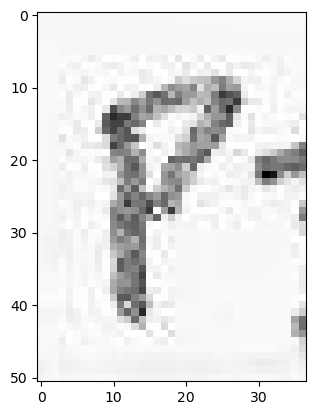

In [130]:
sample = cv2.imread('/home/riikoro/fossil_data/tooth_samples/v3/184.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(sample, cmap = 'gray')
sample.shape

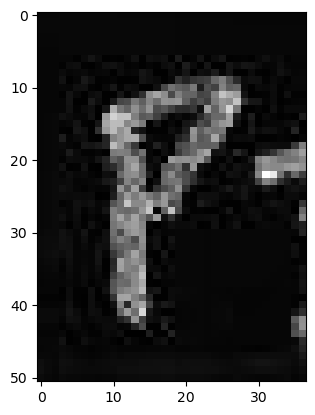

In [131]:
# sample = cv2.resize(sample,(28,28), interpolation = cv2.INTER_AREA)
sample = 255-sample
plt.imshow(sample, cmap='gray')

## Remove noise from image (light-gray around the background)

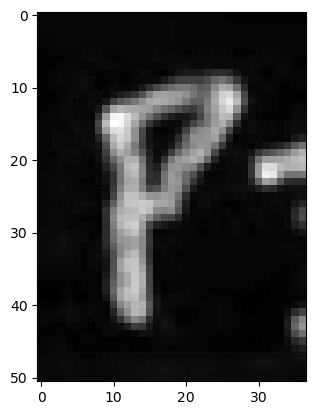

In [132]:

sample = cv2.GaussianBlur(sample, (3, 3), 0)
plt.imshow(sample, cmap='gray')

## Otsu thresholding: convert to binary image

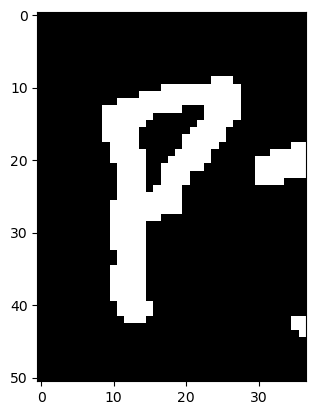

In [133]:
_, sample = cv2.threshold(sample, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(sample, cmap='gray')

## Remove number: segment image, take the one on the left only

In [146]:
contours, _ = cv2.findContours(sample, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

3

In [147]:
# find bounding boxes for contours
contour_boxes = []
for contour in contours:
    box = cv2.boundingRect(contour)
    contour_boxes.append(box)
# contour_boxes = np.array(contour_boxes)
contour_boxes

[(35, 42, 2, 3), (30, 18, 7, 6), (9, 9, 19, 34)]

In [148]:
# find 2 largest contours
# largest_contours = []
# for contour in contours:
#     if len(largest_contours) < 2:
#         largest_contours.append(contour)
    

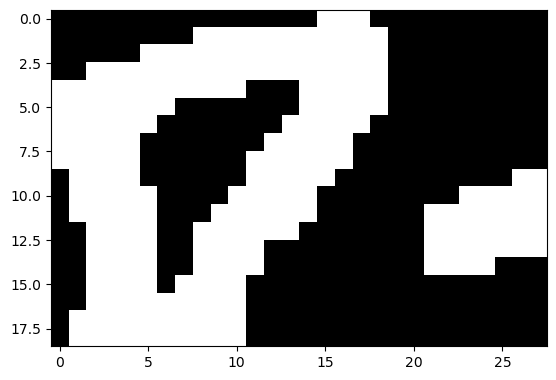

In [149]:
# take the largest contour
box_sizes = map(lambda box: box[2]*box[3], contour_boxes)

# of the 2 contours, which has first element smaller
letter_i = np.argmax(np.array(list(box_sizes)))
(x,y,w,h) = contour_boxes[letter_i]
letter_img = sample[x:x+w,y:y+h]
plt.imshow(letter_img, cmap='gray')

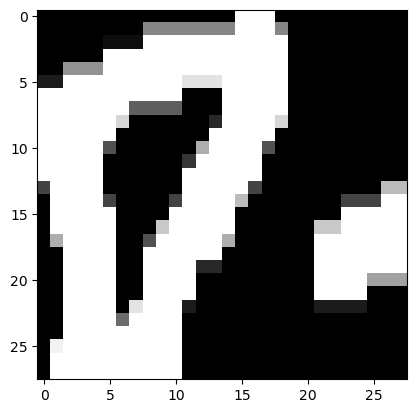

In [150]:
# shape to 28x28
final = cv2.resize(letter_img,(28,28), interpolation = cv2.INTER_AREA)
plt.imshow(final, cmap='gray')

### Run for all data

TODO: better segmentation solution for extracting the letter

48


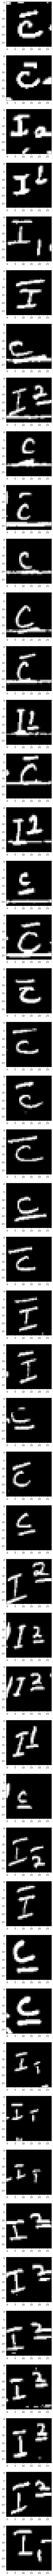

In [168]:
def preprocess(sample):
    sample = 255-sample
    sample = cv2.GaussianBlur(sample, (3, 3), 0)
    _, sample = cv2.threshold(sample, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # contours, _ = cv2.findContours(sample, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # contour_boxes = []
    # for contour in contours:
    #     box = cv2.boundingRect(contour)
    #     contour_boxes.append(box)
    
    # box_sizes = map(lambda box: box[2]*box[3], contour_boxes)

    # # of the 2 contours, which has first element smaller
    # letter_i = np.argmax(np.array(list(box_sizes)))
    # (x,y,w,h) = contour_boxes[letter_i]
    # letter_img = sample[x:x+w,y:y+h]
    final = cv2.resize(sample,(28,28), interpolation = cv2.INTER_AREA)
    return final

imgs = glob.glob('/home/riikoro/fossil_data/tooth_samples/v5/*.png')
print(len(imgs))
fig, ax = plt.subplots((len(imgs)), figsize = (10,200))
for filename in imgs:
    i = int(filename.split('/')[-1].split('.')[0])
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    result = preprocess(img)
    ax[i].imshow(result, cmap='gray')